### Initialize the environment

In [59]:
import theano
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
src_dir='../src' # source directory
run_dir_prefix='../MDBN_run/AML_Batch_' # directory with the results of previous runs
data_dir='../data' # directory with the data files

In [61]:
import sys
sys.path.insert(0, src_dir)
import MDBN
import main

### Load the experiment results

In [62]:
run=1
date_time='2017-02-20_2302' # specify the date and time of the run in the format YYYY-MM-DD_HHMM
run_dir=run_dir_prefix+date_time
runfile='Exp_%s_run_%s.npz' % (date_time, run) # location of the experiment results
config, dbn_dict = MDBN.load_network(runfile, run_dir)

### Configuration of the experiment

In [63]:
config

{u'dbns': {u'GE': {u'batchSize': 1,
   u'datafile': u'AML/AML_gene_expression_table2.csv.gz',
   u'epochs': [2, 800],
   'inputNodes': 19937,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [400, 40],
   u'lr': [0.0005, 0.1],
   u'persistent': False},
  u'ME': {u'batchSize': 1,
   u'datafile': u'AML/AML_miRNA_Seq_table2.csv.gz',
   u'epochs': [2],
   'inputNodes': 559,
   u'k': 10,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [40],
   u'lr': [0.005],
   u'persistent': False},
  u'SM': {u'batchSize': 1,
   u'datafile': u'AML/AML_somatic_mutations_table2.csv.gz',
   u'epochs': [2, 800],
   'inputNodes': 1686,
   u'k': 1,
   u'lambdas': [0.0, 0.1],
   u'layersNodes': [200, 20],
   u'lr': [0.01, 0.1],
   u'persistent': False}},
 u'p': 1.0,
 u'pathways': [u'ME', u'GE', u'SM'],
 u'runs': 4,
 u'seed': 1234,
 u'top': {u'batchSize': 1,
  u'epochs': [800, 800],
  'inputNodes': 100,
  u'k': 1,
  u'layersNodes': [24, 3],
  u'lr': [0.1, 0.1],
  u'persistent': False},
 u'uuid': u'9bbefc05

### Load the dataset and visualize the input of the pathways

In [64]:
datafiles = main.prepare_TCGA_datafiles("AML",config,data_dir)

### Look at the joint layer representation

In [65]:
dbn_output_list=[]
for key in config['pathways']:
    dbn_output, _ = dbn_dict[key].MLP_output_from_datafile(datafiles[key], datadir=data_dir)
    dbn_output_list.append(dbn_output)

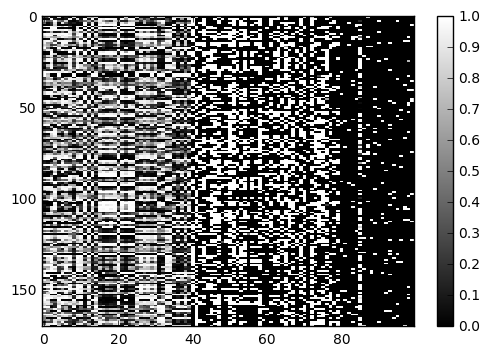

In [66]:
joint_layer = np.concatenate(dbn_output_list,axis=1)
plt.imshow(joint_layer, interpolation='none', cmap='gray')
plt.axis('tight')
plt.colorbar()

In [67]:
joint_layer[1:10,1:10]

array([[  3.39444652e-02,   9.74038005e-01,   1.17023766e-01,
          4.09262702e-02,   2.29968932e-02,   7.10280985e-02,
          9.57864225e-01,   6.44066036e-02,   8.89262378e-01],
       [  3.62066031e-01,   4.34933811e-01,   9.90671515e-01,
          4.68554407e-01,   3.56838614e-01,   8.31297994e-01,
          4.18426283e-02,   9.68471635e-03,   7.88046122e-02],
       [  2.12009437e-02,   1.79437846e-01,   8.73003840e-01,
          3.09408251e-02,   9.11107361e-01,   3.42638701e-01,
          5.93357459e-02,   1.35112837e-01,   3.13167907e-02],
       [  1.47614116e-03,   1.31878763e-01,   7.87608147e-01,
          2.99065560e-03,   1.58849321e-02,   8.42449721e-03,
          5.70341498e-02,   1.49002168e-02,   2.47835312e-02],
       [  9.84606028e-01,   9.78847206e-01,   9.23595607e-01,
          9.18003023e-01,   7.57033944e-01,   9.91000056e-01,
          4.90364790e-01,   2.53009312e-02,   9.36470330e-01],
       [  1.33498150e-04,   9.78299558e-01,   9.97112513e-01,
   

### Check the weights distributions

([array([  0.00000000e+00,   7.00000000e+00,   2.16000000e+02,
           2.17400000e+03,   6.59500000e+03,   7.40900000e+03,
           3.01900000e+03,   5.02000000e+02,   1.40000000e+01,
           1.00000000e+00]),
  array([  1.00000000e+00,   3.40000000e+01,   4.24000000e+02,
           2.73000000e+03,   7.04800000e+03,   6.78200000e+03,
           2.50700000e+03,   3.91000000e+02,   1.90000000e+01,
           1.00000000e+00]),
  array([  1.00000000e+00,   4.00000000e+00,   1.80000000e+02,
           1.75300000e+03,   5.87300000e+03,   7.66700000e+03,
           3.75900000e+03,   6.51000000e+02,   4.90000000e+01,
           0.00000000e+00]),
  array([    0.,    14.,   274.,  2354.,  6762.,  7209.,  2868.,   429.,
            27.,     0.]),
  array([  1.00000000e+00,   1.60000000e+01,   3.35000000e+02,
           2.63100000e+03,   7.01400000e+03,   6.92600000e+03,
           2.65600000e+03,   3.30000000e+02,   2.80000000e+01,
           0.00000000e+00]),
  array([  0.00000000e+00,  

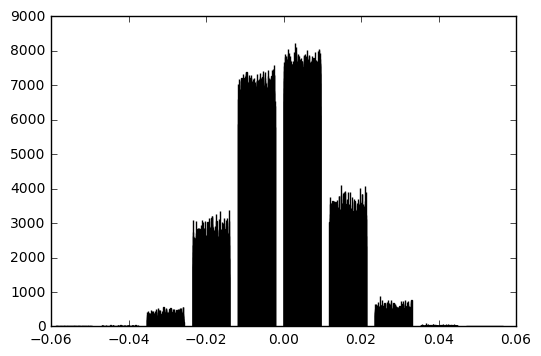

In [68]:
plt.hist(dbn_dict['GE'].rbm_layers[0].W.get_value())

### Check final results

([<matplotlib.axis.XTick at 0x13c492c10>,
 <a list of 3 Text xticklabel objects>)

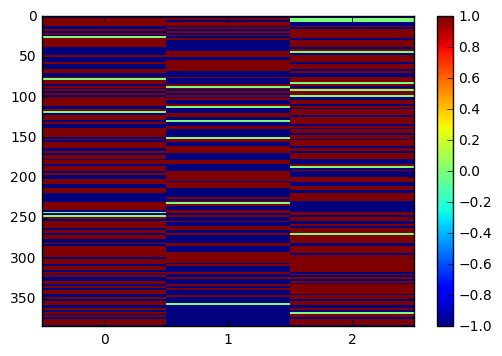

In [69]:
top_output = dbn_dict['top'].get_output(theano.shared(joint_layer,borrow=True))
plt.imshow((top_output>0.8)*np.ones_like(top_output)-(top_output<0.2)*np.ones_like(top_output),interpolation='none',extent=[0,3,385,0])
plt.colorbar()
plt.axis('tight')
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([<matplotlib.axis.XTick at 0x139868810>,
 <a list of 3 Text xticklabel objects>)

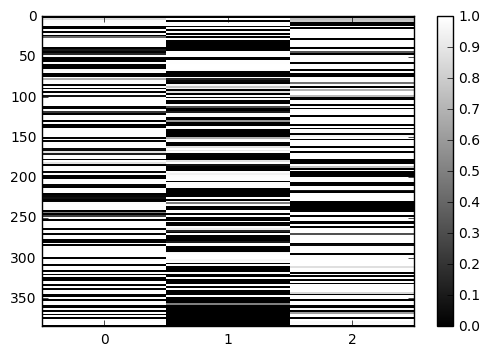

In [70]:
plt.imshow(top_output, interpolation='none',extent=[0,3,385,0],cmap='gray')
plt.axis('tight')
plt.colorbar()
plt.xticks(np.arange(0.5,3.5,1),('0','1','2'))

([array([ 66.,   3.,   2.,   0.,   2.,   0.,   1.,   0.,   3.,  93.]),
  array([ 94.,   3.,   0.,   1.,   2.,   1.,   1.,   1.,   3.,  64.]),
  array([  58.,    0.,    0.,    2.,    1.,    0.,    1.,    5.,    2.,  101.])],
 array([  1.28539373e-36,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 3 Lists of Patches objects>)

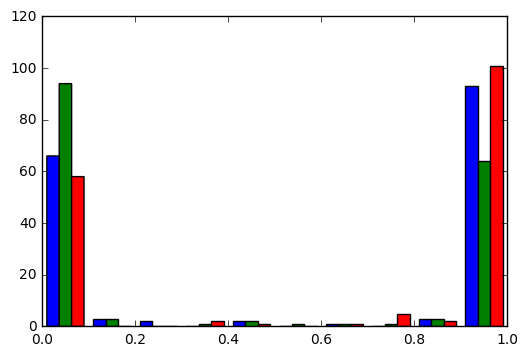

In [71]:
plt.hist(top_output)

In [72]:
code = (top_output[:,0:3] > 0.5) * np.ones_like(top_output[:,0:3])

In [73]:
from utils import find_unique_classes
U = find_unique_classes(code)
cl = U[0]

(array([ 15.,  19.,  11.,  28.,  12.,  54.,  23.,   8.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]),
 <a list of 8 Patch objects>)

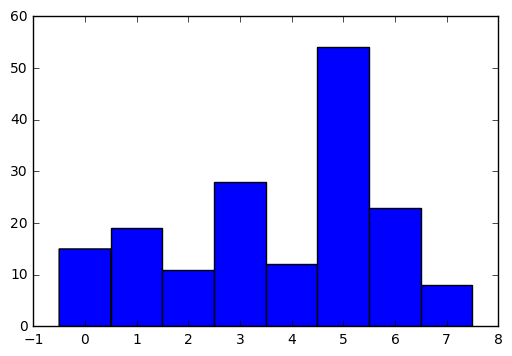

In [74]:
max_cl = np.max(cl)
plt.hist(cl,bins=np.arange(-0.5,max_cl + 1.5,1))

Check Survival curves for the different classes
===============================================

In [75]:
import csv
import gzip
id=[]
filename='../data/'+datafiles['ME']
if filename.endswith('.gz'):
    openfun=gzip.open
else:
    openfun=open
with openfun(filename) as f:
    my_csv = csv.reader(f,delimiter='\t')
    id = my_csv.next()

In [76]:
stat={}
with open('../data/AML/AML_clinical_data2.csv') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        patient_id=row[0]
        stat[patient_id]=(row[4],row[7],row[6])

In [77]:
import re
time_list = []
event_list = []
group_list = []
DEAD=1
ALIVE=0
print('The following case IDs were  not found in clinical data')
for index, key in enumerate(id[1:]):
    m = re.match('TCGA-\w+-\d+', key)
    patient_id = m.group(0)
    if patient_id in stat:
        patient_stat = stat[patient_id]
        add_group = True
        try:
            time_list.append(float(patient_stat[2]))
            event_list.append(DEAD)
        except ValueError:
            try:
                time_list.append(float(patient_stat[1]))
                event_list.append(ALIVE)
            except ValueError:
                print('No data for %s' % patient_id)
                add_group = False
        if add_group:
            group_list.append(cl[index])
    else:
        print(patient_id)

The following case IDs were  not found in clinical data
No data for TCGA-AB-2887
No data for TCGA-AB-2891
No data for TCGA-AB-2918
No data for TCGA-AB-2921
No data for TCGA-AB-2930
No data for TCGA-AB-2940
No data for TCGA-AB-2943
No data for TCGA-AB-2946
No data for TCGA-AB-2975


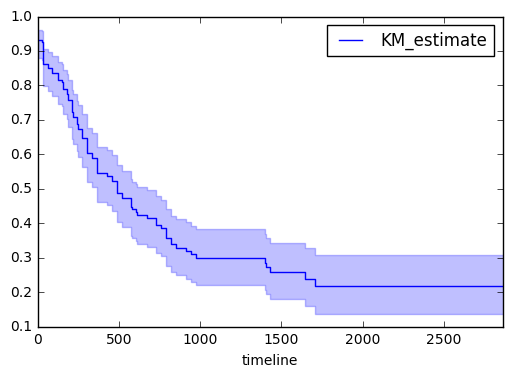

In [78]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(time_list,event_observed=event_list)
kmf.plot()

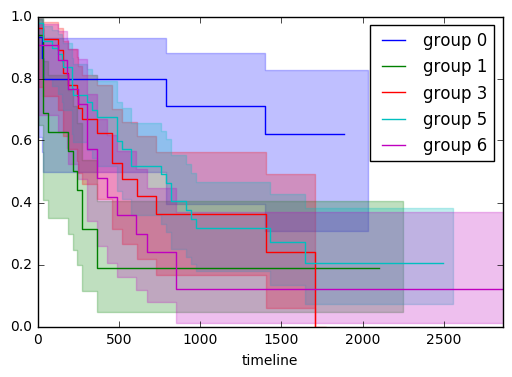

In [81]:
T=np.array(time_list)
E=np.array(event_list)
ix = (np.array(group_list) == 0)
kmf.fit(T[ix], E[ix], label='group 0')
ax=kmf.plot()
for i in [1,3,5,6]:
    ix=(np.array(group_list)==i)
    kmf.fit(T[ix], E[ix], label='group %d' % i)
    kmf.plot(ax=ax)